In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## <center style="color: red"> "Artificial Intelligence and Data Science" </center>
## <center style="color: red"> Linear Algebra (Assignment 01)</center>

### Problem $A$: Cartesian Coordinate system

- $A.1$ Starting from a point

In [120]:

#Function that is used to plot points on 2D or 3D plane
def plot_points(*args, dim):
    """
    This function is used to plot 2D or 3D points

    Args:
    *args(float), dim(int): args are varible # arguments, and dim is a keyword argument 

    Return:
    None
    """

    #Check if number of dimensions are two and only 2D points are passed
    if dim == 2 and len(args) == 2:
        #Unpack the args tuple
        x_cor, y_cor = args
        
        fig = plt.figure(figsize=(5, 4))
        plt.plot(x_cor, y_cor, 'g*', markersize=12)

        #Set title and labels
        plt.title("Point on 2D Plane")
        plt.xlabel("X-axis", fontdict={'color': 'red'})
        plt.ylabel("Y-axis", fontdict={'color': 'red'})
        plt.show()
    elif dim == 3 and len(args) == 3:
        #Extract all the three coordinates and only 3D points are passed
        x_cor, y_cor, z_cor = args
        
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d') #Add on subplot to my canvas
        ax.scatter(x_cor, y_cor, z_cor, marker="*", c="green", s=80)

        #Set title and labels
        ax.set_title("Point on 3D Plane")
        ax.set_xlabel("X-axis", fontdict={'color': 'red'})
        ax.set_ylabel("Y-axis", fontdict={'color': 'red'})
        ax.set_zlabel("Z-axis", fontdict={'color': 'red'})
        plt.show()
    else:
        return "dimensions more than three can not be visualized."


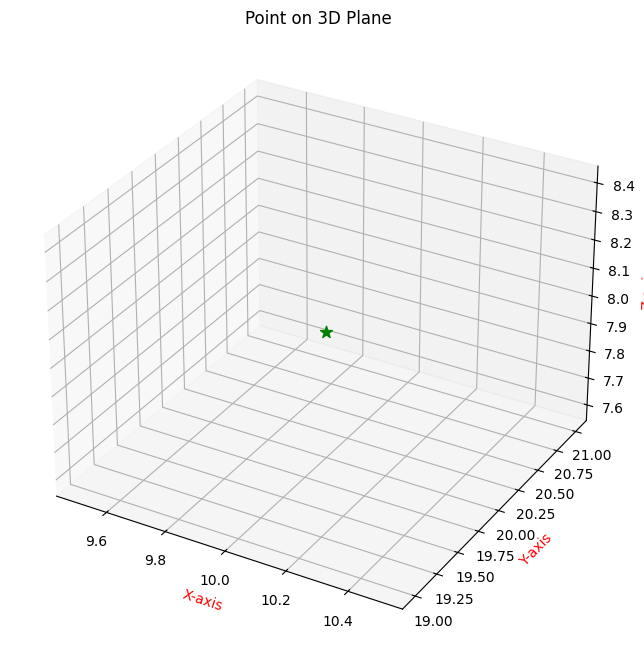

In [121]:
#Function call to test the logic
plot_points(10, 20, 8, dim=3)

- $A.2$ Points and Vectors

In [122]:
from numpy.linalg import norm

#This function is used to compute the algebra of two points
def compute_algebra(u, v):
    """
    This function computes the distance b/w two points, angle b/w two vectors,
    norm of vectors, equation of plane and projection of one vector to another

    Parameters:
    int(u), int(v): Two input points in nD

    Return:
    None
    """
    
    #Compute the distance b/w u and v
    distance = norm(u - v, ord=2)
    print(f"Distance b/w two points is: {np.round(distance, 3)}")
    print("=" * 80)

    #Compute the angle b/w two vectors joining points u and v from origin
    angle_in_radians = np.arccos(u.dot(v) / (norm(u) * norm(v)))
    angle_in_degrees = np.degrees(angle_in_radians)
    print(f"Angle b/w two vectors is: {np.round(angle_in_degrees, 3)}")
    print("=" * 80)
    

    #Compute the norm of two vectors u and v
    print(f"Norm of first vector is: {np.round(norm(u), 3)}")
    print(f"Norm of second vector is: {np.round(norm(v), 2)}")
    print("=" * 80)
    

    #Find the equation of plane
    mid_point = (u + v) / 2
    #Vector form of line points joining u and v
    dir_rations = v - u 
    #Calculate intercept made by plane
    intercept = dir_rations.dot(mid_point)
    equation = ""
    count = 0
    for k in dir_rations:
        equation += str(k) + f"{"x"}_{str(count)}" + " + "
        count += 1
    print(f"Equation of plane is: {equation + str(intercept) + " = 0 "}")
    print("=" * 80)
    
    

    #The projection of one vector on the other
    #Let u projects on v (Projection of u on v : ((u . v) / |v|^2 ) * v
    projected_vector = u.dot(v) / (norm(v, ord=2) ** 2)
    print(f"Projected vector on 'v' is: {projected_vector * v}")
    print("=" * 80)
    

In [123]:
#Two points on 4D
u = np.array([1, -8, 3, 6])
v = np.array([3, 4, 5, 9])

print(" " * 40, "Point and Vector Algebra\n")
#Function call to compute algebra
compute_algebra(u, v)

                                         Point and Vector Algebra

Distance b/w two points is: 12.689
Angle b/w two vectors is: 70.536
Norm of first vector is: 10.488
Norm of second vector is: 11.45
Equation of plane is: 2x_0 + 12x_1 + 2x_2 + 3x_3 + 10.5 = 0 
Projected vector on 'v' is: [0.91603053 1.22137405 1.52671756 2.7480916 ]


In [124]:
#Another half of A.2
def parallelism(dot_product, norm_product):   
    """
    Check whether the two vectors are parallel or not
    u and v are paralle if (u.v = |u| * |v| or u.v = - |u| * |v|)

    Parameter:
    dot_product(float), norm_product(float): Input values

    Return:
    message(str): A string that tell us whether u and v are parallel or not
    """
    
    #Check if dot product is equal to norm product or negative of norm product
    if dot_product in [norm_product, -norm_product]:
        return "u and v are parallel"
    else:
        return "u and v are not parallel"


def orthogonality(dot_product, norm_product):
    """
    Check whether the two vectors are orthogonal or not
    u and v are orthogonal if (u.v = 0)

    Parameter:
    dot_product(float), norm_product(float): Input values

    Return:
    message(str): A string that tell us whether u and v are orthogonal or not
    """

    #Check if dot product is equal to 0 or not
    if dot_product == 0:
        return "u and v are orthogonal"
    else:
        return "u and v are not orthogonal"


def same_magnitude(u, v):
    """
    Check whether the two have same the magnitude or not
    u and v will have the same magnitude if |u| = |v|

    Parameter:
    u(numpy.array), v(numpy.array): Input arrays

    Return:
    message(str): A string that tell us whether u and v are of same magnitude or not
    """

    #Check if |u| = |v|
    if np.round(norm(u), 3) == np.round(norm(v), 3):
        return "u and v have the same magnitude"
    else:
        return "u and v doesn't have the same magnitude"



def coincide(u, v):
    """
    Check whether the two vectors coincide or not
    u and v will coincide if they are identical 

    Parameter:
    u(numpy.array), v(numpy.array): Input Vectors

    Return:
    message(str): A string that tell us whether u and v are coincident or not
    """

    #Check if dot product == norm product
    if not norm(u - v):
        return "u and v coincident"
    else:
        return "u and v doesn't coincide"


#Only applicable for vectors in 2D and 3D
def projection(u, v):
    """
    Find the projection of vector u on orthogonal component of vector v

    Parameter:
    u(numpy.array), v(numpy.array): Input Vectors

    Return:
    orthogonal_vector(numpy.array): Return an orthogonal vector
    """
    
    if v.shape[0] == 2:
        #Orthogonal component of v in 2D
        v_orthogonal = np.array([-v[0], v[1]])

        #Pojection of u on v_orthogonal is given by
        return "🫵Projected Vector: " + str((u.dot(v_orthogonal) /(norm(v_orthogonal) ** 2)) * v_orthogonal)
    elif v.shape[0] == 3:
        #Orthogonal component of v in 3D
        v_orthogonal = np.cross(u, v)
        
        #Pojection of u on v_orthogonal is given by
        return "🫵Projected Vector: " + str(u.dot(v_orthogonal) / ((norm(v_orthogonal) ** 2) * v_orthogonal))

    return "Invalid Dimensions"
    

#Function to select the operation
def select_operation():
    while True:
        print("Enter any of the below operation")
        print(" 👉 parallelism")
        print(" 👉 orthogonality")
        print(" 👉 same_magnitude")
        print(" 👉 coincide")
        print(" 👉 projection")

        return input("Enter operation: ")



#Define operations
operations = {
    "parallelism": parallelism,
    "orthogonality": orthogonality,
    "same_magnitude": same_magnitude,
    "coincide": coincide,
    "projection": projection
}



#Function to perform on selected operation
def vector_albegra(u, v, operation):
    #Compute dot and norm products
    dot_product = np.dot(u, v)
    norm_product = np.round(norm(u) * norm(v), 3)

    #Get the operation from dictionary
    operation_fun = operations.get(operation)
    #Return result of operation
    if operation in ["same_magnitude", "projection", "coincide"]:
        return operation_fun(u, v)
    return operation_fun(dot_product, norm_product)

In [125]:
u = np.array([1, 2, 3])
v = np.array([1, 20, 3])

print(" " * 40, "Point and Vector Algebra (Another Half)\n")
#Select and perform the required operation to the selected operator
selected_operation = select_operation()
vector_albegra(u, v, selected_operation)

                                         Point and Vector Algebra (Another Half)

Enter any of the below operation
 👉 parallelism
 👉 orthogonality
 👉 same_magnitude
 👉 coincide
 👉 projection


Enter operation:  coincide


"u and v doesn't coincide"

- $A.3$ Planes

In [126]:
def compute_distance(equ_of_plane, point):
    """
    This function will compute the distance of a point from plane.
    Distance b/w point and plane is given by 
    ((transpose(normal).dot(point)) + intercept) / norm(normal)

    Parameters:
    equ_of_plane(numpy.array), point(numpy.array): Input point and equation of plane

    Return:
    distance(float): Distance b/w point and plane
    """

    #From equation of plane grab normal
    normal = equ_of_plane[:-1]

    #Compute intercept and distance
    intercept = equ_of_plane[-1]
    distance = (np.dot(np.transpose(normal), point) + intercept) / norm(normal)

    return np.round(distance, 4)

def is_parallel(equ_of_plane, line_equ):
    """
    This function will check whether the line is parallel to plane or not
    A line is parllel to plane, if the dot product of normal vector of plane and direction vector
    of line = 0, i,e dot(normal, direction_vector) == 0)

    Parameters:
    equ_of_plane(numpy.array), line_equ(numpy.array): Input equation of plane and equation of line

    Return:
    bool: True if line is parallel to plane else False 
    """
    #Grab normal of plane and direction vector of line
    normal = equ_of_plane[:-1]
    direction_vector = line_equ[:-1]
    
    #Compute intercept and check if dot product is zero
    intercept = equ_of_plane[-1]
    decide = np.dot(normal, direction_vector)

    #Return True if decide is 0 else False
    return True if decide == 0 else False


def point_lies_on_plane(equ_of_plane, point):
    """
    This function will check whether the points lies on the line or not
    A point lies in the plane if it satisfies the equation of a plane

    Parameters:
    equ_of_plane(numpy.array), point(numpy.array): Input equation of plane and coordinates of point

    Return:
    bool: True if Point lies on the plane else False
    """
    #Grab the intercept and normal of plane
    intercept = equ_of_plane[-1]
    normal = equ_of_plane[:-1]
    

    #Check if intercept is equal to dot product of normal with point
    return True if intercept == np.dot(normal, point) else False




In [127]:
#Given equation of a plane and a point
print(" " * 40, "Plane Algebra\n")
equ_of_plane = np.array([2, 3, 0, 8]) # Where [2, 3, 4] is a normal vector, and -8 is an intercept
point = [1, 2, 3]
#Compute distance from plane to point
print(f"🫵 Distance from plane to point is: {compute_distance(equ_of_plane, point)}")
print("="*80)


#Check whether the line is parallel to plane or not
line_equ = [3, 4, 5, 7] # Where [3, 4, 5] is a direction vector, and 7 is an intercept
if is_parallel(equ_of_plane, line_equ):
    print("🫵 Line is parallel to plane")
else:
    print("🫵 Line is not parallel to plane")
print("="*80)


#Check whether the point lies on the plane or not
if point_lies_on_plane(equ_of_plane, point):
    print("🫵 Point lies on the plane")
else:
    print("🫵 Point doesn't lie on the plane")
print("="*80)


                                         Plane Algebra

🫵 Distance from plane to point is: 4.4376
🫵 Line is not parallel to plane
🫵 Point lies on the plane


### Problem $B$: The Polar and Cylindrical Coordinate System


- $B.1$ Conversion of 2D coordinates


In [128]:
def cartesian_to_polar(point):
    """
    This function converts cartesian coordinates into polar coordinates

    Parameter:
    point(numpy.array): Input cartesian coordinate

    Return:
    polar_cord(numpy.array): Output polar coordinate
    """
    
    x = point[0] #Getting x coordinate of point
    y = point[1] #Getting y coordinate of point

    
    #Compute r(radius of circle) and theta (angle made by radius with +ive direction of x-axis
    r = np.round(norm(point), 3)

    #Check for division by zero condition
    angle = np.arctan2(y , x)
       
    #Convert radian measure into degree measure
    angle = np.round(np.degrees(angle), 3)

    #Return polar coordinate
    return np.array([r, angle])


def polar_to_cartesian(point):
    """
    This function converts polar coordinates into cartesian coordinates

    Parameter:
    point(numpy.array): Input polar coordinate

    Return:
    polar_cord(numpy.array): Output cartesian coordinate
    """

    r = point[0] #Getting r from given point
    theta = np.radians(point[1]) #Getting theta from given point and converting it into radians

    #Computing x and y coordinates respectivelly
    x = np.round(r * np.cos(theta), 3)
    y = np.round(r * np.sin(theta), 3)

    #Return cartesian coordinates
    return np.array([x, y])
    


In [129]:
#Cartesian to polar conversion
polar_cor = cartesian_to_polar(np.array([0, 10]))
print(f"Equivalent polar coordindate is: {polar_cor}")

#Polar to cartesian conversion
cartesian_cor = polar_to_cartesian(polar_cor)
print(f"Equivalent cartesian coordindate is: {cartesian_cor}")

Equivalent polar coordindate is: [10. 90.]
Equivalent cartesian coordindate is: [ 0. 10.]


- Given vectors in polar coordinate do the same exercise as the Cartesian system. Given two points in polar coordinate calculate:
    - The distance between the two points.
    - Angle between the vectors.
    - Whether the vectors coincide or not. Whether the vectors are orthogonal or not.


In [130]:
def parallelism(u, v):   
    """
    Check whether the two vectors are parallel or not
    u and v are paralle if (|theta(u) - theta(v)| == 90 or 0)

    Parameter:
    u(numpy.array), v(numpy.array): Input vectors

    Return:
    message(str): A string that tell us whether u and v are parallel or not
    """

    theata_u = u[1] #Angle made by r in u
    theata_v = v[1] #Angle made by r in v
    
    #Check if the absolute of theat's are 0 or 90 degrees
    if np.abs(theata_u - theata_v) in [0, 90]:
        return "u and v are parallel"
    else:
        return "u and v are not parallel"


def orthogonality(u, v):
    """
    Check whether the two vectors are orthogonal or not
    u and v are orthogonal if (|theta(u) - theta(v)| == 90)

    Parameter:
    u(numpy.array), v(numpy.array): Input vectors

    Return:
    message(str): A string that tell us whether u and v are orthogonal or not
    """

    theata_u = u[1] #Angle made by r in u
    theata_v = v[1] #Angle made by r in v
    
    #Check if the absolute of theat's is 90 degrees
    if np.abs(theata_u - theata_v) == 90:
        return "u and v are orthogonal"
    else:
        return "u and v are not orthogonal"


def same_magnitude(u, v):
    """
    Check whether the two vectors have same magnitude or not
    u and v have same magnitude if (r_u == r_v)

    Parameter:
    u(numpy.array), v(numpy.array): Input vectors

    Return:
    message(str): A string that tell us whether u and v have same magnitude or not
    """

    r_of_u = u[0] #Magnitude of coordinate u
    r_of_v = v[0] #Magnitude of coordinate v
    
    #Check if r value's are same
    if  r_of_u == r_of_v:
        return "u and v have same magnitudel"
    else:
        return "u and v doesn't have same magnitude"



def coincide(u, v):
    """
    Check whether the two vectors are coincide or not
    u and v are coincide if they are identical, i,e same r's and theta's

    Parameter:
    u(numpy.array), v(numpy.array): Input vectors

    Return:
    message(str): A string that tell us whether u and v are coincide or not
    """
    #Compute r's
    r_of_u = u[0] #Magnitude of coordinate u
    r_of_v = v[0] #Magnitude of coordinate v

    #Compute theat's
    theata_u = u[1] #Angle made by r in u
    theata_v = v[1] #Angle made by r in v
    
    #Check if dot product == norm product
    if r_of_u == r_of_v and theata_u == theata_v:
        return "u and v coincides"
    else:
        return "u and v doesn't coincide"





def distance(point1, point2):
    """
    Compute the distance b/w point1 and point2
    
    Parameter:
    u(numpy.array), v(numpy.array): Input points

    Return:
    distance(float): Return distance b/w two points
    """
    
    #Compute r's
    r1, theta1 = point1 #Unpacking point1
    r2, theta2 = point2 #Unpacking point2
    
    #Compute angle difference and distance
    angle_diff = np.radians(theta2 - theta1)
    distance = np.sqrt((r1 ** 2) + (r2 ** 2) - 2 * r1 * r2 * np.cos(angle_diff))

    #Return distance
    return f"Distance between given points is: {np.round(distance, 3)}"


#Function to select the operation
def select_operation():
    while True:
        print("Enter any of the below operation")
        print(" 👉 parallelism")
        print(" 👉 orthogonality")
        print(" 👉 same_magnitude")
        print(" 👉 coincide")
        print(" 👉 distance")

        return input("Enter operation: ")



#Define operations
operations = {
    "parallelism": parallelism,
    "orthogonality": orthogonality,
    "same_magnitude": same_magnitude,
    "coincide": coincide,
    "distance": distance
}



#Function to perform on selected operation
def vector_albegra(u, v, operation):

    #Check for selection of invalid operation
    try:
        #Select an operation from dict
        operation_fun = operations.get(operation)
        return operation_fun(u, v)
    except TypeError:
        print("Invalid operation had been selected 🙂")
    
    

In [131]:
u = np.array([10, 90])
v = np.array([10, 900])

#Select and perform the required operation to the selected operator
selected_operation = select_operation()
vector_albegra(u, v, selected_operation)

Enter any of the below operation
 👉 parallelism
 👉 orthogonality
 👉 same_magnitude
 👉 coincide
 👉 distance


Enter operation:  distance


'Distance between given points is: 14.142'

- $B.2$ Going to 3D spherical coordinates

- Given a point in 3D in Cartesian coordinate convert it to spherical coordinates and vice- versa.

In [132]:
def cartesian_to_spherical(point):
    """
    This function converts cartesian coordinates into spherical coordinates
    (x,y,z) → (r,θ,φ) 
    r = sqrt(x^2 + y^2 + z^2)
    θ = arccos(z/r)
    φ = arsin(y/rsinθ)
    
    Parameter:
    point(numpy.array): Point in 3D

    Return:
    shperical_coordinate(numpy.array): Equivalent spherical coordinate
    """

    #Unpack coordinates of points
    x, y, z = point

    r = norm(point) #Computing r parameter
    r = np.round(r, 3) #Roundoff r value

    try:
        theta = np.arccos(z / r) #Computing theta parameter
        theta = np.round(theta, 3) #Roundoff theta value
    
        phi = np.arcsin(y / (r * np.sin(theta))) #Computing phi parameter
        phi = np.round(phi, 3) #Roundoff phi value

        #Return equivalent spherical coordinate
        return f"Equivalent spherical coordinates are: {np.array([r, theta, phi])}"

    except ZeroDivisionError:
        print("Division by zero exception occured:(")


def spherical_to_cartesian(point):
    """
    This function converts spherical coordinates into cartesian coordinates
    (x,y,z) → (r,θ,φ) 
    x = rcosφsinθ,     y = rsinφsinθ,       z = rcosθ

    Parameter:
    point(numpy.array): Point in 3D

    Return:
    cartesian_coordinate(numpy.array): Equivalent cartesian coordinate
    """

    #Unpack coordinates of points
    r, theta, phi = point

    x = r * np.cos(phi) * np.sin(theta) #Computing x parameter
    x = np.round(x, 3) #Roundoff x value

    y = r * np.sin(phi) * np.sin(theta) #Computing y parameter
    y = np.round(y, 3) #Roundoff y value

    z = r * np.cos(theta) #Computing z parameter
    z = np.round(z, 3) #Roundoff z value

    #Return equivalent spherical coordinate
    return f"Equivalent cartesian coordinates are: {np.array([x, y, z])}"

        

In [133]:
#Cartesian to spherical conversion
point = np.array([1, 2, 4])
print(cartesian_to_spherical(point))

#Shperical to cartesian conversion
point = np.array([100, 30, 90]) #Theta and phi are passing in degrees
print(spherical_to_cartesian(point))

Equivalent spherical coordinates are: [4.583 0.51  1.106]
Equivalent cartesian coordinates are: [ 44.271 -88.33   15.425]


- Given a point in 3D in Cartesian coordinate convert it to cylindrical coordinates and vice-
versa.

In [134]:
def cartesian_to_cylindrical(point):
    """
    This function converts cartesian coordinates into cylindrical coordinates
    (x,y,z) → (r,θ,z)
    z = z
    r = sqrt(x^2 + y^2)
    θ = arsin(y / r)

    Parameter:
    point(numpy.array): Point in 3D

    Return:
    cylindrical_coordinate(numpy.array): Equivalent cylindrical coordinate
    """

    #Unpack coordinates of points
    x, y, z = point

    #Computing cylindercial coordinages
    z = z #Computing z parameter
    
    r = np.sqrt(x ** 2 + y ** 2) #Computing r parameter
    r = np.round(r, 3) #Roundoff r value

    try:
        theta = np.arcsin(y / r) #Computing phi parameter
        theta = np.round(theta, 3) #Roundoff phi value

        #Return equivalent spherical coordinate
        return f"Equivalent cylindrical coordinates are: {np.array([r, theta, z])}"
    except ZeroDivisionError:
        print("Exception caused by 'division by 0")



def cylindrical_to_cartesian(point):
    """
    This function converts cylindrical coordinates into cartesian coordinates
    (x,y,z) → (r,θ,z) 
    x = rcosθ,    y = r sin θ,    z=z

    Parameter:
    point(numpy.array): Point in 3D

    Return:
    cartesian_coordinate(numpy.array): Equivalent cartesian coordinate
    """

    #Unpack coordinates of points
    r, theta, z = point

    x = r * np.cos(theta)#Computing x parameter
    x = np.round(x, 3) #Roundoff x value

    y = r * np.sin(theta) #Computing y parameter
    y = np.round(y, 3) #Roundoff y value

    #Return equivalent spherical coordinate
    return f"Equivalent cartesian coordinates are: {np.array([x, y, z])}"

        

In [135]:
#Cartesian to cylinderical coordinate conversion
print(cartesian_to_cylindrical(np.array([1, 8, 9])))

#Cylinderical to cartesian conversion
print(cylindrical_to_cartesian(np.array([10, 120, 34]))) #Angle in radians '120' 

Equivalent cylindrical coordinates are: [8.062 1.447 9.   ]
Equivalent cartesian coordinates are: [ 8.142  5.806 34.   ]


- $C$ Shapes to divide points

- $C.1$ Ellipse

In [136]:
def draw_ellipse(a, b, center):
    """
    This function will draw an ellipse with mentioned width, height and center
    Parametric equation of ellipse
    x = u + a cos(t) ; y = v + b sin(t)
    center (u,v)      semi-major axis: a            semi-minor axis: b

    Parameters:
    width(float), height(float), center(numpy.array): Inputs

    Return:
    None
    """

    #Creating a fig and axis
    fig, axes = plt.subplots()

    #Creating 100 equidistant points
    t = np.linspace(0, 2*np.pi, 100)
    plt.plot(center[0] + a * np.cos(t), center[1] + b * np.sin(t), "r--")
    plt.grid(True)

    #Show girds and labels
    plt.grid(True)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Ellipse')
    plt.show()
    

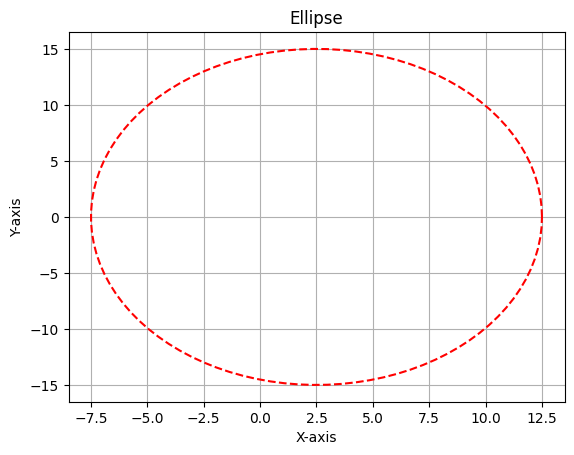

In [137]:
draw_ellipse(10, 15, center=(2.5, 0))

- $C.2$ Polynomial

In [138]:
def polynomial(power, args):
    """
    This function is used to draw any linear shape
    f(x) = x^n + bx^n-1 + cx^n-1 + ... + z

    Parameters:
    power(int), args(numpy.array): A whole number and cofficient vector

    Return:
    None
    """

    #Generate pow + 1 random numbers from 0 to 20
    x = np.linspace(-10, 10, num=100)

    #For each x compute its value
    y = lambda x, pow: x ** pow
    pow_vector = np.array([]) #Empty array to store power of values
    f_of_x = np.array([]) #Array to store final results

    #For each number in x calculte its power
    for val in x:
        pow = power
        while pow >= 0:
            pow_vector = np.append(pow_vector, y(val, pow))
            pow -= 1

        #Append zeros to pow_vector array so that dimensios of args and pow_vector are equal
        lenn = len(args) - len(pow_vector)
        pow_vector = np.append(pow_vector, np.zeros(lenn))

        #The dot product b/w cofficient vector and pow_vector gives us f(x)
        f_of_x = np.append(f_of_x, np.dot(pow_vector, args))
        pow_vector = np.array([]) #Reset pow_vector for new value 
        

    #Plot the x values with f(x)
    fig, axes = plt.subplots()
    axes.plot(x, f_of_x, "r-")

    #Set labels and title
    plt.grid(True)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Polynomial Equation')
    plt.show()
  

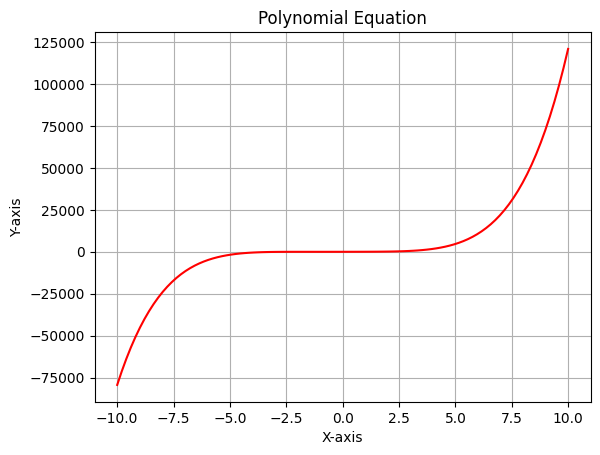

In [139]:
#Plot any polynomial equation
polynomial(5, np.array([1, 2, 0, 8, 19, -7, 80])) # x^6 + 2x^4 + 0x^3 + 8x^2 + 19x^1 - 7x^0 + 80 * 0 